In [2]:
# 17L-4240
# 17L-4328
# 17L-4347



In [3]:
import os
import sys
import random
import math

import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as model_lib
from mrcnn import visualize

# Import fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

%matplotlib inline

# Directory to save logs and trained model
# MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_DIR = 'logs/'

# Local path to trained weights file
# pak_cnic_model_path = os.path.join(ROOT_DIR, "weights/mask_rcnn_.pak_cnic.h5")
# uk_lic_model_path = os.path.join(ROOT_DIR, "weights/mask_rcnn_.uk_lic.h5")
pak_cnic_model_path = 'weights/mask_rcnn_.pak_cnic.h5'
uk_lic_model_path = 'weights/mask_rcnn_.uk_lic.h5'

# Directory of images to run detection on
# IMAGE_DIR = os.path.join(ROOT_DIR, "Dataset/test images")
IMAGE_DIR = 'Dataset/test images'

Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\DS_Project1_36\lib\site-packages\fastbook\__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [4]:
from mrcnn.config import Config
class IDMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "id_MaskRCNN_config"

    # Supported values are: resnet50, resnet101.
    BACKBONE = "resnet50"

    # The strides of each layer of the FPN Pyramid. These values
    # are based on a Resnet101 backbone.
    BACKBONE_STRIDES = [4, 8, 16, 32, 64]

    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1

    # original 1
    IMAGES_PER_GPU = 1

    # number of classes (we would normally add +1 for the background)
     # kangaroo + BG
    NUM_CLASSES = 5+1

    # Number of training steps per epoch
    # original 131
    STEPS_PER_EPOCH = 462

    # Number of validation steps to run at the end of every training epoch.
    # A bigger number improves accuracy of validation stats, but slows
    # down the training.
    VALIDATION_STEPS = 10

    # Learning rate
    LEARNING_RATE=0.006

    # Skip detections with < 90% confidence
    # original 0.9
    DETECTION_MIN_CONFIDENCE = 0.9

    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

config = IDMaskRCNNConfig()
config.display()



Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                18
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.006
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [5]:
# Create Model and Load Trained Weights

# Create model object in inference mode.
pak_cnic_model = model_lib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
uk_lic_model = model_lib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load trained weights
pak_cnic_model.load_weights(pak_cnic_model_path, by_name=True)
uk_lic_model.load_weights(uk_lic_model_path, by_name=True)







Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.







In [6]:
# set class names in both models
pak_cnic_class_names = ['BG', 'First Name', 'Last Name', 'Country', 'ID Number', 'DOB']
uk_lic_class_names = ['BG', 'First Name', 'Last Name', 'Address', 'ID Number', 'DOB']

In [8]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

learn_inf = load_learner('C:/Users/riazz/Documents/PycharmProjects/DS_Project1/weights/export.pkl')


Processing 1 images
image                    shape: (273, 444, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.30000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


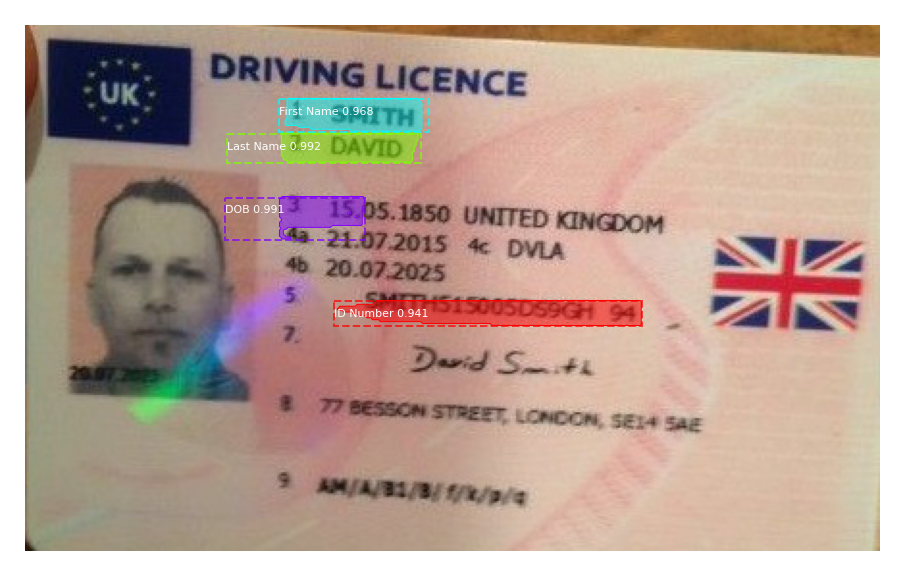

In [10]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
file_name_chosen = os.path.join(IMAGE_DIR, random.choice(file_names))
image = skimage.io.imread(file_name_chosen)

results = []

# get image type
classifier_result = learn_inf.predict(file_name_chosen)

# check pak_cnic or uk_lic
# image_type = 'pk_cnic'
image_type = classifier_result[0]

# Run detection on appropriate model
if image_type == 'pk_cnic':
    results = pak_cnic_model.detect([image], verbose=1)
elif image_type == 'uk_license':
    results = uk_lic_model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            pak_cnic_class_names, r['scores'])
